In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from PIL import Image 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
landscape_dataset = []
for i in range(0, 7128):
  print(i)
  img = cv2.imread('/content/drive/MyDrive/gray/{}.jpg'.format(i), cv2.IMREAD_GRAYSCALE)
  # img = cv2.imread('{}.jpg'.format(i), cv2.IMREAD_GRAYSCALE)
  landscape_dataset.append(img)
  '''plt.imshow(landscape_dataset[i-1])
  plt.title("image {num}".format(num=i))
  plt.show()'''



Streaming output truncated to the last 5000 lines.
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317

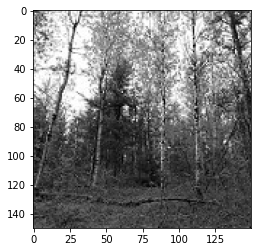

(150, 150)


In [4]:
plt.imshow(landscape_dataset[7060])
plt.gray()
plt.show()
print(landscape_dataset[7060].shape)

In [5]:
def add_gaussian(img, var):
    img_array = np.asarray(img)
    noisy_img = random_noise(img_array, mode="gaussian", var=var)
    noisy_img = (255 * noisy_img).astype(np.uint8)
    return noisy_img


def add_salt_and_pepper(img, probability):
    noisy_img = np.zeros(img.shape, np.uint8)
    threshold = 1 - probability

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rand = random.random()
            if rand < probability:
                noisy_img[i][j] = 0
            elif rand > threshold:
                noisy_img[i][j] = 255
            else:
                noisy_img[i][j] = img[i][j]

    return noisy_img


def add_poisson(img, num):
    noise = np.random.poisson(num, img.shape)
    # noise = np.random.noraml(0, 0.3, (400, 500))*100
    noisy_img = img + noise
    noisy_img = noisy_img.astype(np.uint8)
    return noisy_img


In [6]:
def add_noise(image):
    rand_noise_picker = random.randint(1, 7)

    if rand_noise_picker == 1:
        rand_var = random.uniform(0.02, 0.1)
        img_noise = add_gaussian(image, rand_var)
        effect = ["Gaussian", rand_var]
        noise_type = 1
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 1: Gaussian", img_noise)
        plt.show()'''
    elif rand_noise_picker == 2:
        rand_prob = random.uniform(0.01, 0.1)
        img_noise = add_salt_and_pepper(image, rand_prob)
        effect = ["S&P", rand_prob]
        noise_type = 2
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 2: S&P", img_noise)
        plt.show()'''
    elif rand_noise_picker == 3:
        rand_num = random.randint(5, 45)
        img_noise = add_poisson(image, rand_num)
        effect = ["Poisson", rand_num]
        noise_type = 3
        return img_noise, effect, noise_type
        ''' plt.imshow("Original Image", image)
        plt.imshow("case 3: Poisson", img_noise)
        plt.show()'''
    elif rand_noise_picker == 4:
        rand_var = random.uniform(0.02, 0.1)
        rand_prob = random.uniform(0.01, 0.1)
        img_noise = add_gaussian(image, rand_var)
        img_noise = add_salt_and_pepper(img_noise, rand_prob)
        effect = ["Gaussian + S&P", rand_var, rand_prob]
        noise_type = 4
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 4: Gaussian + S&P", img_noise)
        plt.show()'''
    elif rand_noise_picker == 5:
        rand_var = random.uniform(0.02, 0.1)
        rand_num = random.randint(5, 45)
        img_noise = add_gaussian(image, rand_var)
        img_noise = add_poisson(img_noise, rand_num)
        effect = ["Gaussian + Poisson", rand_var, rand_num]
        noise_type = 5
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 5: Gaussian + Poisson", img_noise)
        plt.show()'''
    elif rand_noise_picker == 6:
        rand_prob = random.uniform(0.01, 0.1)
        rand_num = random.randint(5, 45)
        img_noise = add_salt_and_pepper(image, rand_prob)
        img_noise = add_poisson(img_noise, rand_num)
        effect = ["S&P + Poisson", rand_prob, rand_num]
        noise_type = 6
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 6: S&P + Poisson", img_noise)
        plt.show()'''
    elif rand_noise_picker == 7:
        rand_var = random.uniform(0.02, 0.1)
        rand_prob = random.uniform(0.01, 0.1)
        rand_num = random.randint(5, 45)
        img_noise = add_gaussian(image, rand_var)
        img_noise = add_salt_and_pepper(img_noise, rand_prob)
        img_noise = add_poisson(img_noise, rand_num)
        effect = ["Gaussian + S&P + Poisson", rand_var, rand_prob, rand_num]
        noise_type = 7
        return img_noise, effect, noise_type
        '''plt.imshow("Original Image", image)
        plt.imshow("case 7: Gaussian + S&P + Poisson", img_noise)
        plt.show()'''
    
    '''else:
        return image
        plt.imshow("Original Image", image)
        plt.imshow("Case 8: Clean image", image)
        plt.show()'''


In [7]:
train_dataset = []
if_noise = []
effect = []
for data in landscape_dataset:
  ran = random.randint(0, 4)
  # this should give it about a 20% chance that we're left with a clean image 
  if ran != 0:
    noisy_img, noise_added, noise_type = add_noise(data)
    train_dataset.append(noisy_img)
    effect.append(noise_added)
    if_noise.append(noise_type)
  else:
    script = ["Clean image"]
    clean_img = data
    train_dataset.append(clean_img)
    effect.append(script)
    if_noise.append(0)


7128


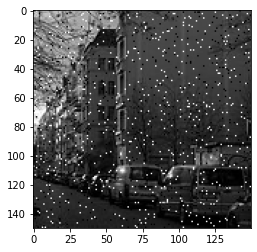

['S&P', 0.024451555537846476]
2


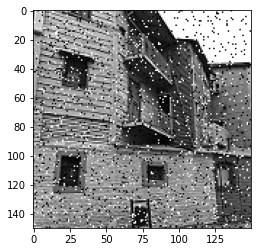

['S&P', 0.04449567990113956]
2


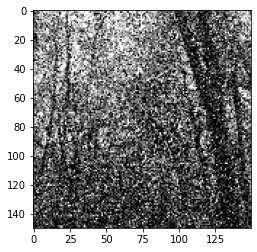

['Gaussian + S&P', 0.05513738435643098, 0.02064538850412876]
4


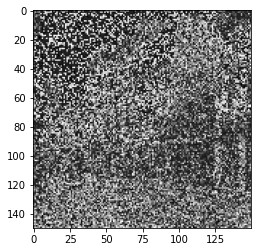

['Gaussian + Poisson', 0.093981342646204, 33]
5


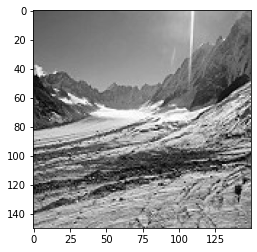

['Clean image']
0


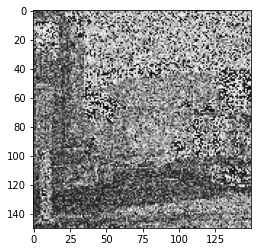

['Gaussian + Poisson', 0.04075114876881524, 38]
5


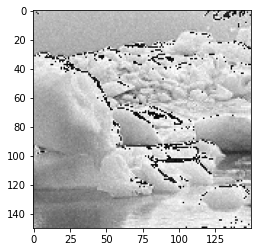

['Poisson', 39]
3


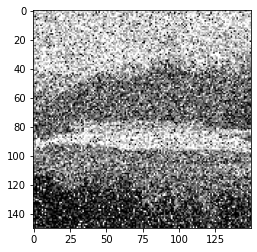

['Gaussian + S&P', 0.050415300481418485, 0.03241554322086978]
4


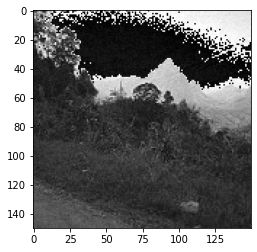

['Poisson', 20]
3


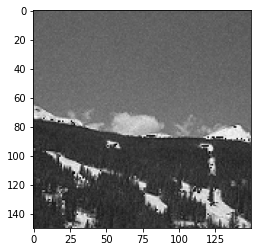

['Poisson', 21]
3


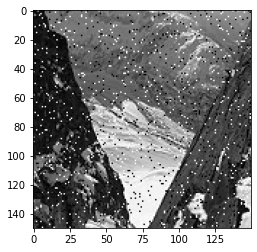

['S&P', 0.02952409614385032]
2


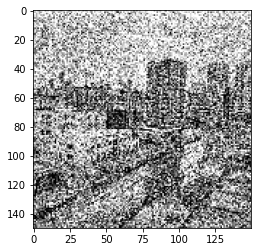

['Gaussian', 0.09300299587781409]
1


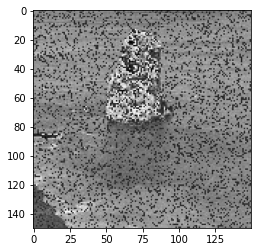

['S&P + Poisson', 0.08479140322247812, 44]
6


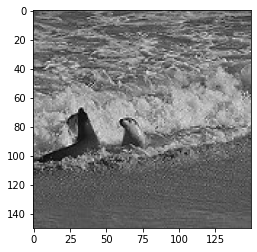

['Clean image']
0


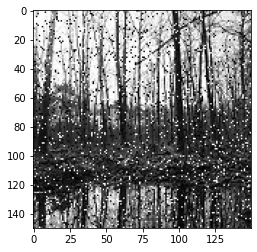

['S&P', 0.051612030071205996]
2


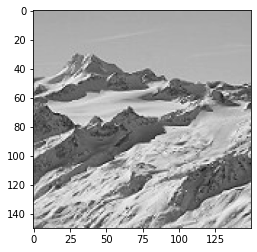

['Clean image']
0


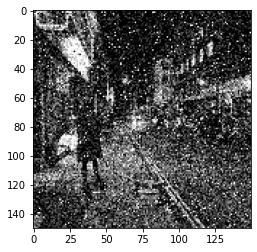

['Gaussian + S&P', 0.03975393600872972, 0.01922806171188269]
4


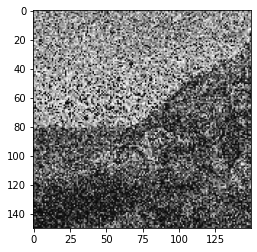

['Gaussian + Poisson', 0.05340433173048094, 15]
5


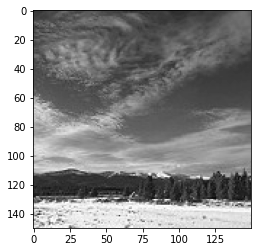

['Clean image']
0


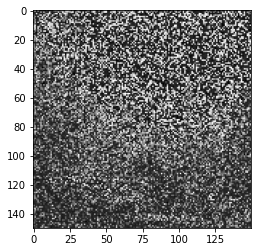

['Gaussian + S&P + Poisson', 0.08122664397081136, 0.09280693454010781, 36]
7


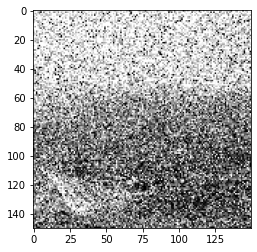

['Gaussian + S&P', 0.0682934917276709, 0.0323894030388999]
4


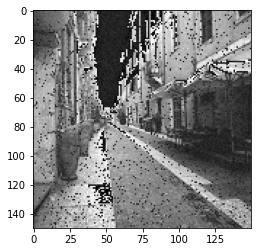

['S&P + Poisson', 0.02707470085270393, 36]
6


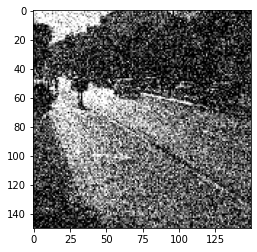

['Gaussian', 0.0607133583406755]
1


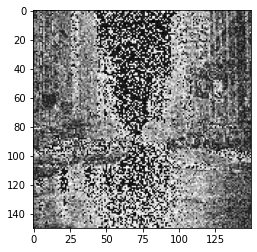

['Gaussian + Poisson', 0.02459244465928461, 29]
5


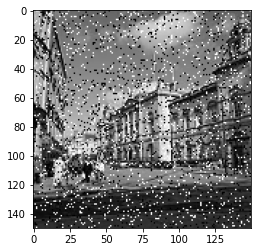

['S&P', 0.05791787421332743]
2


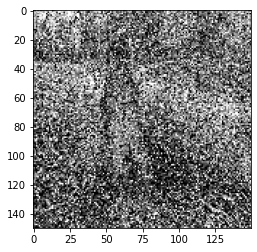

['Gaussian + S&P', 0.04758768163023074, 0.06018573574677466]
4


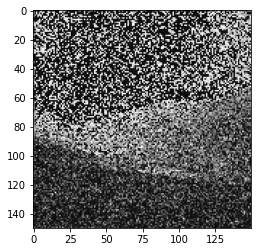

['Gaussian + S&P + Poisson', 0.046536118547733596, 0.06357655611384054, 17]
7


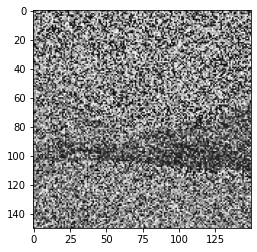

['Gaussian + Poisson', 0.08956414094271356, 32]
5


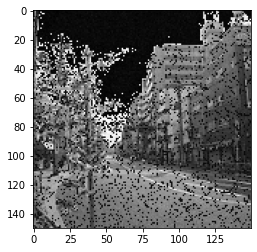

['S&P + Poisson', 0.06040695769140243, 11]
6


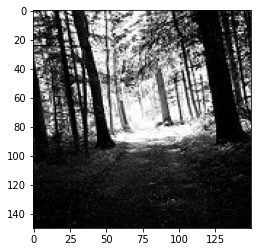

['Clean image']
0


In [8]:
# just running some tests to see if we created out dataset correcntly
print(len(effect))
count = 0
for img in train_dataset:
  if count == 30:
    break
  plt.imshow(img)
  plt.show()
  print(effect[count])
  print(if_noise[count])
  count += 1

In [9]:
print(len(train_dataset))
print(len(if_noise))
print(len(effect))

dim = []
dim = train_dataset[5].ravel()
print(train_dataset[5].shape)
print(dim.shape)

train_dataset_1D = []
for data in train_dataset:
  # make our 2D array into a 2D array with just one row and then select for only the first row
  train_dataset_1D.append(cv2.resize(data, (22500, 1))[0])

print(train_dataset_1D[500])
# print(if_noise[500].shape)''

7128
7128
7128
(150, 150)
(22500,)
[ 89  89  89 ... 138 138 138]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset_1D, if_noise, test_size=0.15, random_state=0)


In [11]:
print(X_train[0])
print(X_train[-1])
print(y_train)

[142 142 142 ... 166 166 166]
[204 204 204 ... 238 238 238]
[2, 2, 1, 3, 0, 2, 3, 1, 3, 0, 4, 2, 6, 7, 0, 4, 3, 0, 4, 0, 0, 0, 3, 6, 5, 1, 0, 3, 7, 2, 3, 2, 7, 2, 3, 4, 0, 6, 4, 6, 3, 0, 3, 7, 2, 6, 0, 2, 2, 5, 5, 0, 6, 0, 2, 7, 4, 6, 6, 0, 6, 2, 2, 2, 7, 1, 5, 0, 1, 6, 6, 0, 0, 3, 5, 7, 4, 0, 6, 4, 0, 7, 2, 3, 7, 3, 2, 0, 7, 6, 3, 5, 2, 0, 3, 0, 4, 0, 6, 7, 4, 3, 6, 7, 3, 7, 7, 5, 3, 0, 0, 3, 3, 4, 2, 4, 7, 5, 4, 7, 0, 7, 0, 0, 7, 6, 3, 1, 0, 5, 7, 1, 2, 1, 6, 1, 0, 1, 3, 4, 3, 4, 0, 5, 7, 3, 5, 2, 0, 6, 2, 0, 3, 6, 7, 6, 6, 2, 7, 4, 3, 2, 3, 7, 3, 4, 5, 7, 4, 4, 4, 3, 3, 6, 7, 3, 5, 2, 1, 6, 4, 7, 4, 3, 6, 2, 2, 4, 6, 4, 2, 0, 0, 3, 5, 0, 0, 4, 5, 3, 6, 7, 3, 1, 1, 7, 6, 7, 2, 7, 0, 4, 2, 7, 5, 6, 0, 6, 5, 0, 7, 4, 6, 5, 5, 7, 3, 2, 0, 4, 0, 4, 1, 4, 4, 7, 4, 6, 5, 3, 1, 5, 4, 2, 5, 2, 3, 2, 6, 1, 1, 7, 2, 5, 0, 6, 6, 6, 4, 5, 6, 6, 6, 7, 5, 6, 5, 6, 3, 1, 5, 0, 5, 7, 0, 0, 4, 0, 4, 7, 0, 5, 4, 0, 1, 3, 7, 7, 0, 5, 3, 1, 3, 7, 3, 7, 5, 0, 4, 0, 2, 4, 3, 5, 5, 4, 1, 3, 4, 3, 3, 2, 5, 

The one major difference we make in our second model is to implement svm for a multilcass classification. We train our svm classifier using an rbf kernel for multiclass classification. we keep the weight for each class equal and we will use the one vs rest approach. 

One vs rest basically means that svm perfroms many single class classifications where it does one class vs the rest. We use this approach because it uses less classifiers and so we should have a shorter execution time. 

In [12]:
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1.0, decision_function_shape='ovr').fit(X_train, y_train)
# next we will compute our predictions and accuracy scores just like in our binary case
y_pred = rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc) # 0.19626168224299065 with rbf and 'ovr', gamma = 1, C = 1

0.21401869158878506


if we run a classification with just adding the three kinds of noise individually withouth combining them, we may get a better classification rate. 